In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv('data/train.csv') 

In [2]:
tst = pd.read_csv('data/test.csv')

In [40]:
tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191157 entries, 0 to 191156
Data columns (total 27 columns):
id                      191157 non-null int64
last_price              191157 non-null float64
mid                     191157 non-null float64
opened_position_qty     139679 non-null float64
closed_position_qty     139679 non-null float64
transacted_qty          191157 non-null float64
d_open_interest         191157 non-null int64
bid1                    191157 non-null float64
bid2                    191157 non-null float64
bid3                    191157 non-null float64
bid4                    191157 non-null float64
bid5                    191157 non-null float64
ask1                    191157 non-null float64
ask2                    191157 non-null float64
ask3                    191157 non-null float64
ask4                    191157 non-null float64
ask5                    191157 non-null float64
bid1vol                 191157 non-null int64
bid2vol                 191157 

In [76]:
tst.head()

,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,...,bid1vol,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol
0,401223,4084.8,4084.9,0.0,1.0,1.0,0,4084.8,4084.6,4084.4,...,3,4,1,3,6,1,2,1,4,3
1,401224,4043.6,4043.8,0.0,5.0,5.0,-5,4043.6,4043.4,4043.2,...,4,2,11,8,5,2,2,7,7,11
2,401225,4046.4,4046.3,1.0,1.0,2.0,0,4046.2,4046.0,4045.8,...,11,6,8,1,1,3,1,1,1,1
3,401226,4003.4,4003.5,10.0,6.0,16.0,5,4003.4,4003.2,4003.0,...,1,2,10,3,2,2,2,7,4,2
4,401227,4112.0,4111.9,NaN,NaN,0.0,0,4111.8,4111.6,4111.4,...,1,3,1,2,2,1,4,2,3,2


In [ ]:
# we notice the only columns with NaN values are opened_position_qty  and closed_position_qty
# we need to either decide what to do with those or throw them away, since they highly correlate with transacted_qty 
# transacted_qty = opened_position_qty + closed_position_qty

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401223 entries, 0 to 401222
Data columns (total 28 columns):
id                      401223 non-null int64
last_price              401223 non-null float64
mid                     401223 non-null float64
opened_position_qty     280241 non-null float64
closed_position_qty     280241 non-null float64
transacted_qty          401223 non-null float64
d_open_interest         401223 non-null int64
bid1                    401223 non-null float64
bid2                    401223 non-null float64
bid3                    401223 non-null float64
bid4                    401223 non-null float64
bid5                    401223 non-null float64
ask1                    401223 non-null float64
ask2                    401223 non-null float64
ask3                    401223 non-null float64
ask4                    401223 non-null float64
ask5                    401223 non-null float64
bid1vol                 401223 non-null int64
bid2vol                 401223 

In [43]:
count_nan = len(df) - dt.count()
count_nan

id                           0
last_price                   0
mid                          0
opened_position_qty     120982
closed_position_qty     120982
transacted_qty               0
d_open_interest              0
bid1                         0
bid2                         0
bid3                         0
bid4                         0
bid5                         0
ask1                         0
ask2                         0
ask3                         0
ask4                         0
ask5                         0
bid1vol                      0
bid2vol                      0
bid3vol                      0
bid4vol                      0
bid5vol                      0
ask1vol                      0
ask2vol                      0
ask3vol                      0
ask4vol                      0
ask5vol                      0
y                            0
dtype: int64

In [44]:
print(df['last_price'].describe())

count    401223.000000
mean       3932.343855
std          75.856788
min        3812.000000
25%        3881.200000
50%        3903.800000
75%        3999.600000
max        4081.000000
Name: last_price, dtype: float64


In [45]:
print(df['mid'].describe())

count    401223.000000
mean       3932.342366
std          75.854815
min        3812.100000
25%        3881.100000
50%        3903.700000
75%        3999.500000
max        4080.900000
Name: mid, dtype: float64


In [46]:
y = df.y

In [47]:
y.value_counts()

0    259668
1    141555
Name: y, dtype: int64

In [48]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e1f2ba8>,
      dtype=object)

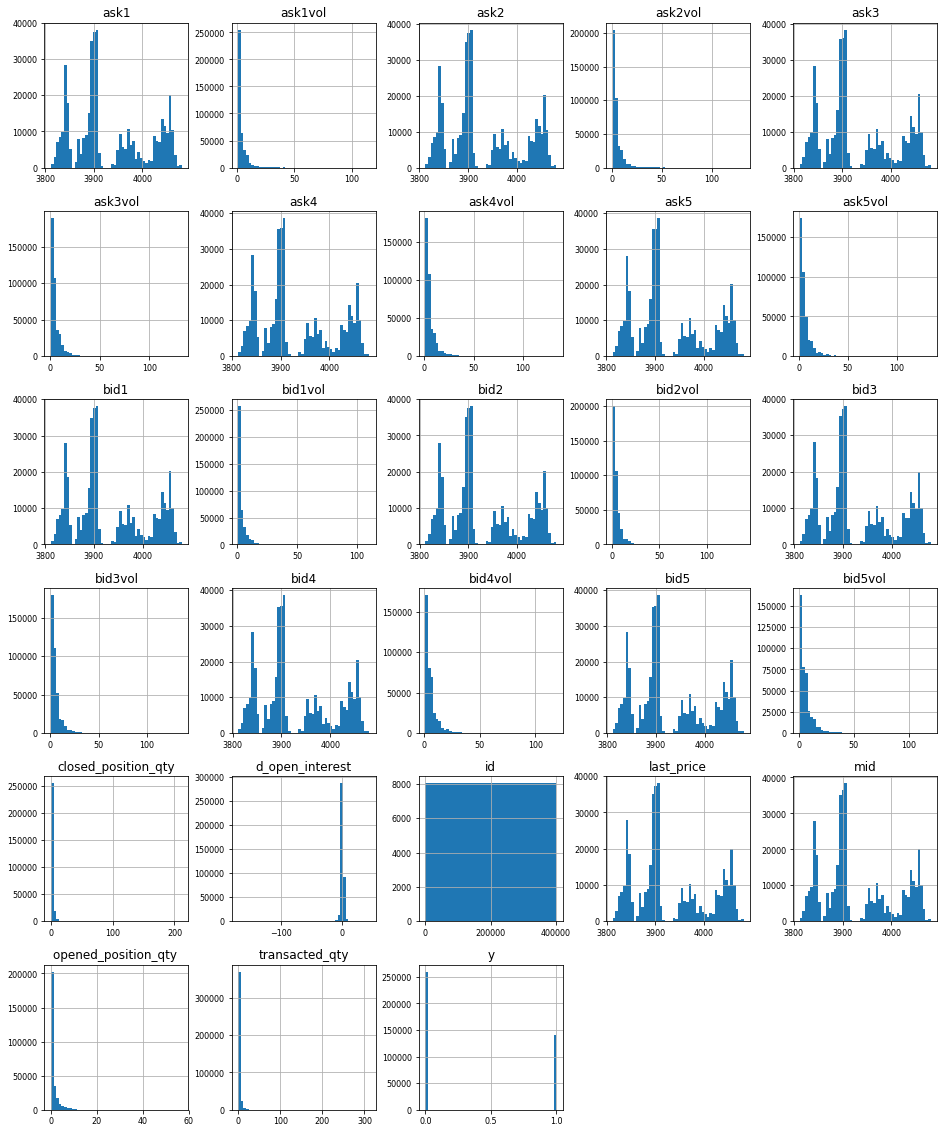

In [49]:
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [50]:
df_corr = df.corr()['y'][1:-1]
df_corr


# we see that strongest correlation is w/  bid1vol, makes sense, strongest negative w/  ask1vol 
# so like the more buyers less seleers - higher prob

last_price              0.011557
mid                     0.011194
opened_position_qty     0.033349
closed_position_qty     0.046777
transacted_qty          0.057254
d_open_interest        -0.017158
bid1                    0.011154
bid2                    0.011240
bid3                    0.011246
bid4                    0.011246
bid5                    0.011243
ask1                    0.011233
ask2                    0.011359
ask3                    0.011374
ask4                    0.011383
ask5                    0.011393
bid1vol                 0.090275
bid2vol                 0.030833
bid3vol                 0.008520
bid4vol                 0.008019
bid5vol                 0.003634
ask1vol                -0.129292
ask2vol                -0.027712
ask3vol                -0.009802
ask4vol                -0.006100
ask5vol                -0.010194
Name: y, dtype: float64

In [59]:
golden_features_list = df_corr[abs(df_corr) > 0.012].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 8 strongly correlated values with SalePrice:
bid1vol                 0.090275
transacted_qty          0.057254
closed_position_qty     0.046777
opened_position_qty     0.033349
bid2vol                 0.030833
d_open_interest        -0.017158
ask2vol                -0.027712
ask1vol                -0.129292
Name: y, dtype: float64


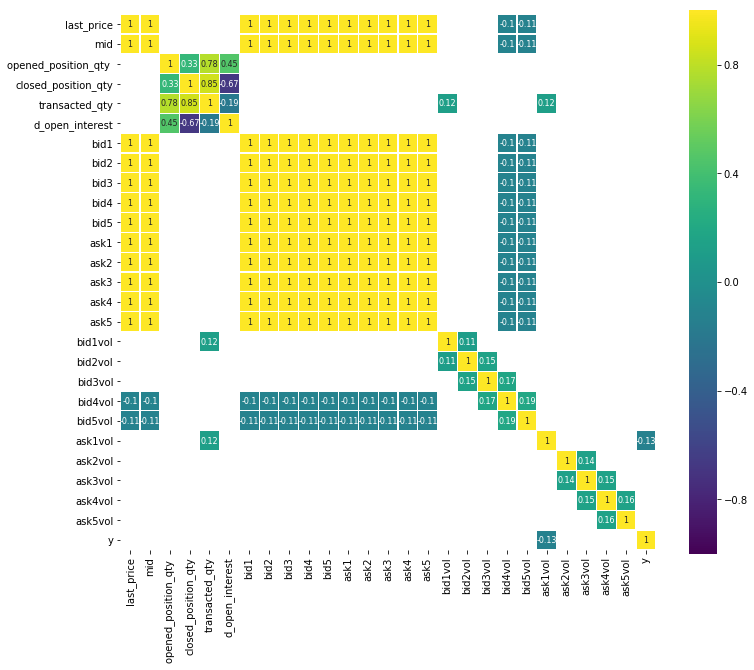

In [54]:
corr = df.drop('id', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [123]:
df.columns

Index(['id', 'last_price', 'mid', 'opened_position_qty ',
       'closed_position_qty', 'transacted_qty', 'd_open_interest', 'bid1',
       'bid2', 'bid3', 'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5',
       'bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol',
       'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol', 'y', 'Value', 'value',
       'sm'],
      dtype='object')

In [3]:
df = df.assign(value = lambda x: x.bid1vol / x.ask1vol)
df = df.assign(sm = lambda x: (x.bid1vol+x.bid2vol+x.bid3vol+x.bid4vol+x.bid5vol) / (x.ask1vol+x.ask2vol+x.ask3vol+x.ask4vol+x.ask5vol))


# I have an impression that an important metric is how many people bid relative to how many ask. 
# The table says bid1 and ask1 are 'the best', idk if its important, but i compared people who bid/asked those 
# and people who bid/asked overall


train_data = df[['transacted_qty', 'bid1vol', 'bid2vol', 'd_open_interest',  'ask1vol', 'ask2vol', 'value', 'sm']]
train_data
#values = train_data.bid1vol / train_data.ask1vol
#train_data['Values'] = values

,transacted_qty,bid1vol,bid2vol,d_open_interest,ask1vol,ask2vol,value,sm
0,103.0,8,1,0,6,1,1.333333,1.750000
1,55.0,7,6,-43,1,4,7.000000,1.347826
2,84.0,3,1,-69,1,16,3.000000,1.025000
3,37.0,10,13,-30,2,7,5.000000,1.782609
4,41.0,14,12,-35,1,3,14.000000,1.096774
5,29.0,1,6,-5,1,12,1.000000,0.658537
6,39.0,1,7,-34,11,15,0.090909,0.562500
7,28.0,1,2,-20,2,12,0.500000,0.702128
8,32.0,1,1,-28,1,2,1.000000,0.657143
9,15.0,1,17,-9,7,1,0.142857,1.400000


In [130]:
cols = ['last_price', 'mid', 'transacted_qty', 'd_open_interest', 'bid1',
       'bid2', 'bid3', 'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5',
       'bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol',
       'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol', 'value',
       'sm']
X = df[cols]
y = df.y
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

Selected features: ['last_price', 'mid', 'transacted_qty', 'bid1', 'ask5', 'ask1vol', 'value', 'sm']


In [ ]:
# Yeah idk how this works but we see that the new features 'value' and 'sm' work pretty ok

/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

Optimal number of features: 10
Selected features: ['last_price', 'mid', 'transacted_qty', 'bid1', 'ask1', 'ask4', 'ask5', 'ask1vol', 'value', 'sm']


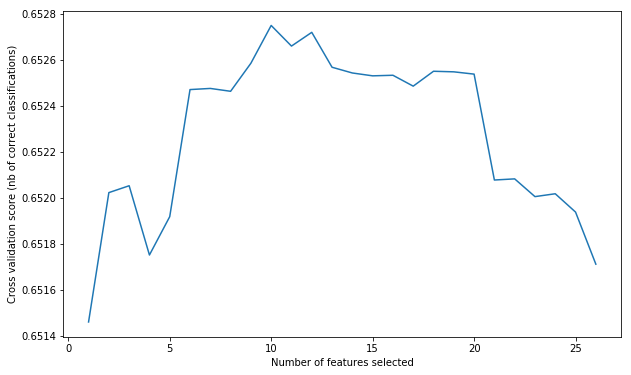

In [131]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
# ^^ if you scroll down from warnings it says Optimal number of features: 10
# Selected features: ['last_price', 'mid', 'transacted_qty', 'bid1', 'ask1', 'ask4', 'ask5', 'ask1vol', 'value', 'sm']

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X = train_data
y = df.y

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [115]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
#y_pred_proba = logreg.predict_proba(X_test)[:, 1]
#[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
#print('Train/Test split results:')
#print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
#print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
#print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))




/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [116]:
tst = tst.assign(value = lambda x: x.bid1vol / x.ask1vol)
tst = tst.assign(sm = lambda x: (x.bid1vol+x.bid2vol+x.bid3vol+x.bid4vol+x.bid5vol) / (x.ask1vol+x.ask2vol+x.ask3vol+x.ask4vol+x.ask5vol))


X_test = tst[['transacted_qty', 'bid1vol', 'bid2vol', 'd_open_interest',  'ask1vol', 'ask2vol', 'value', 'sm']]
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.40229156, 0.4060077 , 0.42430894, ..., 0.39646954, 0.31163888,
       0.33767501])

In [117]:
ydf = pd.DataFrame(y_pred_proba)
ydf

,0
0,0.402292
1,0.406008
2,0.424309
3,0.468705
4,0.343104
5,0.311133
6,0.447477
7,0.859320
8,0.354084
9,0.397023


In [118]:
tst['id']

0         401223
1         401224
2         401225
3         401226
4         401227
5         401228
6         401229
7         401230
8         401231
9         401232
10        401233
11        401234
12        401235
13        401236
14        401237
15        401238
16        401239
17        401240
18        401241
19        401242
20        401243
21        401244
22        401245
23        401246
24        401247
25        401248
26        401249
27        401250
28        401251
29        401252
           ...  
191127    592350
191128    592351
191129    592352
191130    592353
191131    592354
191132    592355
191133    592356
191134    592357
191135    592358
191136    592359
191137    592360
191138    592361
191139    592362
191140    592363
191141    592364
191142    592365
191143    592366
191144    592367
191145    592368
191146    592369
191147    592370
191148    592371
191149    592372
191150    592373
191151    592374
191152    592375
191153    592376
191154    5923

In [119]:
res = pd.concat([tst['id'], ydf], axis = 1, keys=['id', '0'])

In [120]:
res

,id,0
,id,0
0,401223,0.402292
1,401224,0.406008
2,401225,0.424309
3,401226,0.468705
4,401227,0.343104
5,401228,0.311133
6,401229,0.447477
7,401230,0.859320
8,401231,0.354084


In [121]:
pd.DataFrame(res).to_csv("data/proba.csv", index=None)

In [136]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression( solver='lbfgs', max_iter=200)



cols1 = ['last_price', 'mid', 'transacted_qty', 'd_open_interest', 'bid1',
       'bid2', 'bid3', 'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5',
       'bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol',
       'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol', 'value',
       'sm']
cols = ['last_price', 'mid', 'transacted_qty', 'bid1', 'ask1', 'ask4', 'ask5', 'ask1vol', 'value', 'sm']
X = df[cols]
results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.653 (+/-0.004)
LogisticRegression average log_loss: 0.629 (+/-0.005)
LogisticRegression average auc: 0.636 (+/-0.010)


In [ ]:
X = final_train[cols]
y = final_train['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)

In [ ]:
from sklearn.model_selection import cross_validate
scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

from sklearn.svm import SVC

modelCV = SVC(gamma='auto', probability=False)

y = df.y


cols1 = ['last_price', 'mid', 'transacted_qty', 'd_open_interest', 'bid1',
       'bid2', 'bid3', 'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5',
       'bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol',
       'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol', 'value',
       'sm']
cols = ['last_price', 'mid', 'transacted_qty', 'bid1', 'ask1', 'ask4', 'ask5', 'ask1vol', 'value', 'sm']
X = df[cols]
results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))